In [1]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#path = 'filteredimages/Leaf_Rust'
path = 'equalizedimages/Leaf_Rust'

training_data = []
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(128,128))
    training_data.append([pic])


np.save(os.path.join(path,'features'),np.array(training_data))

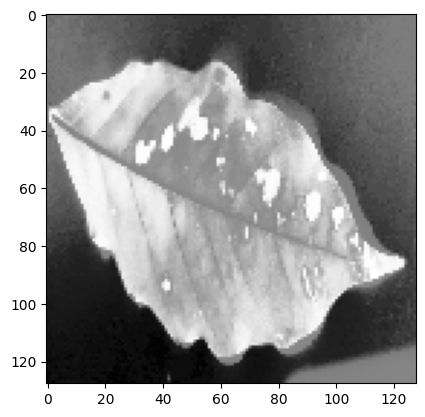

In [2]:
#loading the saved file once again
saved = np.load(os.path.join(path,'features.npy'))
plt.imshow(saved[1].reshape(128,128,3))
plt.imshow(np.array(training_data[1]).reshape(128,128,3))



In [4]:
import pandas as pd
#data = pd.read_csv('filteredimages/leaf_dataset_resized.csv', header=0)
data = pd.read_csv('equalizedimages/equalized_dataset.csv', header=0)

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel16374,pixel16375,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383
0,0,127,126,124,121,121,117,113,109,107,...,139,140,144,146,148,151,152,153,154,154
1,0,121,121,120,126,123,116,114,116,132,...,138,142,142,141,143,146,147,145,143,146
2,0,132,129,125,131,130,132,124,125,121,...,81,78,83,85,88,89,97,92,94,109
3,0,133,117,117,120,115,113,114,113,102,...,98,101,101,99,109,110,112,101,104,111
4,0,161,158,159,161,160,159,157,156,157,...,92,105,100,89,93,99,106,102,97,95


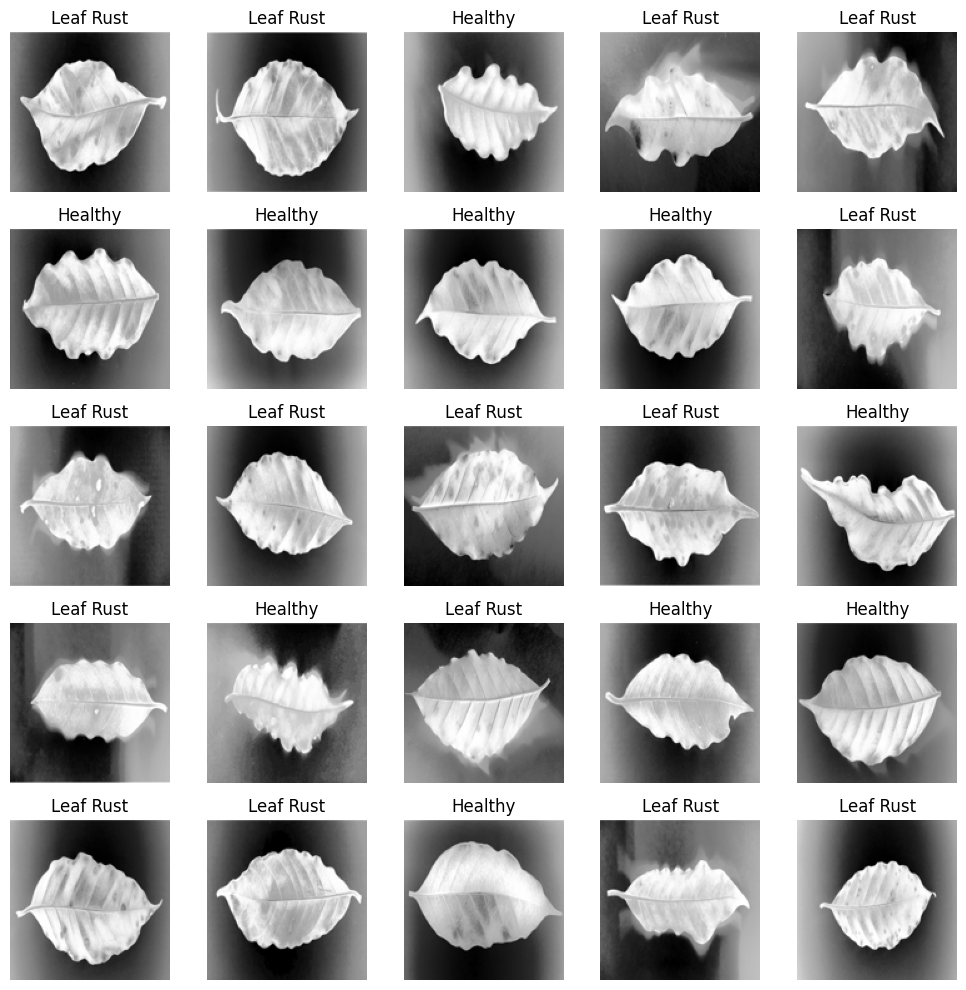

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Status = {0: "Healthy", 1: "Leaf Rust"}

fig, axes = plt.subplots(5, 5, figsize=(10,10))

samples = data.sample(25).reset_index(drop=True)

for index, value in enumerate(axes.ravel()):
    img = samples.iloc[index, 1:].values.reshape(128, 128)
    value.imshow(img, cmap='gray')
    value.set_title(Status[samples.iloc[index, 0]])
    value.axis('off')
plt.tight_layout()
plt.show()